# Bridges 

### Pretend your PC to be a Raspberry Pi or ESP32, connecting I2C/SPI/GPIO/UART peripherals, using Python. 


[GitHub repo.](https://github.com/Wei1234c/Bridges)

Wei Lin  
2019-4-2

![Bridges](https://raw.githubusercontent.com/Wei1234c/Bridges/master/jpgs/Between_the_Grand_Island_bridges.jpg)  

## [使用情境]
- 使用 PC 直接驅動  I2C/SPI/GPIO/UART 周邊裝置，例如以 SPI介面控制 SX1278 LoRa transceiver，直接收發 LoRa 訊息封包。
- 在 PyCharm 的環境下直接開發 I2C 裝置的驅動程式，可以設定中斷點 並隨時檢視變數值。不需要寫一些 print 指令，也不需要重複地上傳程式碼到裝置上，驅動程式開發完畢之後 上傳到裝置上即可運作。

## [緣由與目標]
會想寫這個 package 主要有幾個原因:  

- **需要使用 PC 連接 I2C/SPI/GPIO/UART 介面的周邊**
    - 最近進行的一些使用 Python 撰寫的專案，需要使用 I2C/SPI介面的感測器，但是 PC 上面並沒有外露的 I2C/SPI 介面接口，所以需要外接 USB to I2C/SPI 的轉換器。
    - 市面上有很多種 USB to I2C/SPI/GPIO/UART 的轉換器，比較便宜，銷售數量較多的有 [FTDI](https://www.ftdichip.com/) 的 [FT232H](https://www.ftdichip.com/Products/ICs/FT232H.htm), [FT2232H](https://www.ftdichip.com/Products/ICs/FT2232H.htm) 和 [WCH](http://www.wch.cn/) 的 [CH341](http://www.wch.cn/products/CH341.html)...等數種。 FTDI 的文件與開發資源相當齊全，而 CH341 方面的文件就比較少了些。  
- **轉換器的驅動**:
    - 因為文件與資源相對較齊全，要驅動 FT232H/FT2232H 就有很多 libraries/套件 可以用，但考慮跨平台的可攜性，最後選擇使用 [PyFtdi](http://eblot.github.io/pyftdi/)。
    - PyFtdi 可以驅動 FT232H/FT2232H，介接 I2C/SPI/GPIO/UART 的感測周邊，但是要能順利的使用這些周邊裝置，還需要相關的 library，例如要驅動 OLED display，除了要能以 I2C 或 SPI硬體介面連接之外，還需要有例如 SSD1306 的驅動程式才能順利地在螢幕上顯示訊息。
    - 這些針對性的驅動程式 普遍地存在於 ESP8266/ESP32/Raspberry Pi 的生態圈中，有很多是使用 (Mico)Python 撰寫的，有些不須修改，或者經過少許修改，就可以直接在 PC 上執行。
- **介接現有的裝置 libraries 和 PyFtdi**
    - 但是這些 (Mico)Python 上的驅動程式 與 PyFtdi 所提供的 I2C/SPI/GPIO/UART 元件介面有不少差異，如果可以製作一層 **[adapters](https://en.wikipedia.org/wiki/Adapter_pattern)**，應該可以讓這些 libraries 順利的在 PC 上透過 USB-I2C/SPI/GPIO/UART 轉換器來驅動周邊裝置。

- FT232H DevKit</br>  
 <p><img src='https://raw.githubusercontent.com/Wei1234c/Bridges/master/jpgs/FT232H.jpg'  width="320" align="left"></p>  

- CH341A DevKit</br>  
 <p><img src='https://raw.githubusercontent.com/Wei1234c/Bridges/master/jpgs/CH341a.jpg'  width="320" align="left"></p>  

- **開發與除錯的方便性**
    - 在 RPi 或 ESP32 上面開發，IDE 與 debug,測試環境並不如在 PC上面來得完備，往返來回耗時費力
    - 在 PC 環境下 Python 強大的開發資源，可以做到一些在 MicroPython / ESP32 甚至 Raspberry Pi 上無法做到的事情
    - 借重 PC 上的 IDE 與 開發環境
        - 可以開發 for 周邊裝置的 libraries，然後再將 libraries 移到 RPi 或 ESP 上面使用
        - 因此，PC 上的 GPIO, SPI, I2C 介面 必須同時相容於 RPi 和 ESP 上的原生介面
        - match RPi 和 ESP 上的 SPI, I2C, GPIO 介面
        - 目標是提供 wraper for USB convertors IC
        - 方便的 除錯環境
            - 為 SPI/I2C/GPIO/UART 周邊設備開發 libraries 或 開發相關系統 的時候，可以方便 debug
                -break points
                - variable inspection
    - 模擬 MicroPython 或 Raspberry 上的 I2C/SPI/GPIO/UART 物件，讓 device libraries 可以直接介接
        - 在 PC 上就可以套用這些 libraries 驅動感測器 
        

- **目標**
 
  - 擴增 buses 數量
      - C上面沒有外露的 SPI/I2C 介面
      - Raspberry Pi 上面的 SPI/I2C buses 有限，如果需要比較多的 buses 的時候，可以外接多個 USB to I2C/SPI/GPIO/UART converters，擴增 buses 數量 
  - 要能在各種 OS 下通用 
  - 可以在 PC / Raspberry Pi 上面使用
  - 要能搭配各種轉接器
  - 要能使用各種 buses 
      - SPI
      - I2C      
      - GPIO
      - UART
  - 介接
      - device library for MicroPython
          - machine 
      - device library for Raspberry
          - smbus2.SMbus
          - spidev.SpiDev
          - RPi.GPIO
          - PySerial.Serial 
          
          
                
## [作法與特色]

- 只需要一套 API 就可以 在不同的 平台 (Windows, Linux, RPi, ESP) 上 使用 Python 控制 SPI, I2C, GPIO, UART, PRT 的裝置
- 在 PC 上開發的程式 可以直接套用在 不同的硬體平台上
- 可以使用 不同的 USB convertors
    - 在 PC 須可以使用 CH341A 或 FT232H
    - 在 RPi 上面 須可以使用 CH341A 或 FT232H， 或者直接使用 SpiDev, SMbus, 或者 RPi.GPIO
    - 對 client 程式來說應該是透明的 client 可以不需要知道現在底層是用哪一套 API
- 可以在 PC 上快速開發雛形，移植到 RPi 或 ESP32 上之後仍然可以正常運作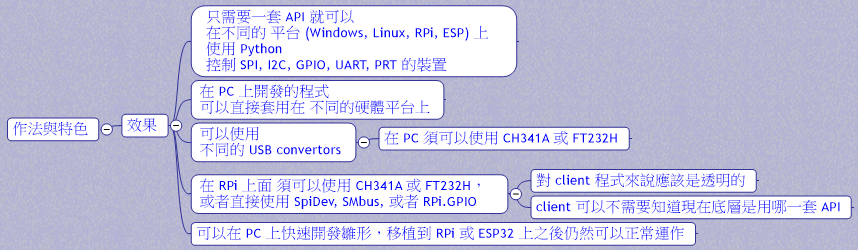

 
 

 
## [測試結果]
- 測試設備與組成
  - 以 PC 執行 client 端程式將 tasks 分派給一個由三個 ESP32 所組成的 cluster 來處理，請參考下列 video 的說明。
  - 詳細的程式碼，請參考 [測試用的 Jupyter notebook](https://github.com/Wei1234c/Broccoli/blob/master/notebooks/demo/mini%20cluster%20test.ipynb)   
 
 
[![ROS chatters on Windows](https://raw.githubusercontent.com/Wei1234c/Broccoli/master/jpgs/youtube.jpeg)](https://youtu.be/LbiSnh8w1kM)  



## [優缺點與應用]
- 缺點
- 優點


#### Notes
- 


#### Reference:  
  1. [Celery On Docker Swarm](https://github.com/Wei1234c/CeleryOnDockerSwarm/blob/master/celery_projects/CeleryOnDockerSwarm.md)   
  1. [IoT as Brain](https://github.com/Wei1234c/IOTasBrain)   
  1. [Elastic Network of Things with MQTT and MicroPython](https://github.com/Wei1234c/Elastic_Network_of_Things_with_MQTT_and_MicroPython)